# Credit Card Fraud Detection: Classification Project

## Intro
Credit card transactions are certainly all around us, and arguably the most popular means of completing purchases. Therefore, detecting fraudulent attempts is of paramount importance. Machine Learning (ML) can be of help towards this direction: the task of distinguishing valid versus fraudulent transactions can be viewed as an ML **Classification problem**.

For this project, I will use a dataset made public by the Machine Learning Group of ULB (Université Libre de Bruxelles). The datasets contains credit card transactions made by European cardholders, in September 2013.

For the implementation, I mainly used the libraries numpy, pandas, matplotlib, seaborn, scikit-learn.

![](images/credit_card.jpg?raw=true)

## Workflow followed

The process I followed has generally been:

* Data loading
* Pre-processing & Data Exploration
* Assessing pathways of handling an imbalanced dataset
* Model Training & Performance Evaluation
* Tuning of model hyperparameters for the selected algorithm


## Data Loading
Importing the necessary libraries, and the dataset:

In [3]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.ticker as ticker

In [4]:
#importing the csv fle
df = pd.read_csv('creditcard.csv')

## Pre-processing & Data Exploration

Let's have a look at the top rows of the dataset, and the features of of the dataframe.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Having a look at the dataset, we see that there are *no missing data (no Null values*), so no need for data imputation from my side.

There are exactly 31 features, and 284,807 records. The features are the following: 

- **Time**: Number of seconds elapsed between a transaction and the first transaction in the dataset
- **Amount**: Amount of transaction (possibly in EUR)
- **Class**: "Class 0" stands for non-fraudulent transactions, and "Class 1" for fraudulent ones
- **V1-V28**: Anonymized features that may contain sensitive consumer information / personal data

I will start by checking the distribution of the features we are more aware of: *Time, Amount, Class*.

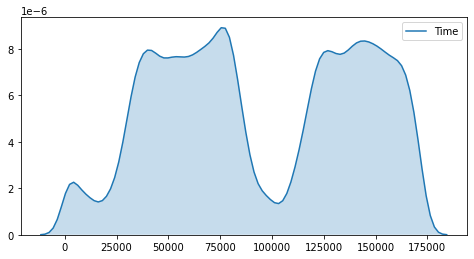

In [7]:
#TIME : distribution of its values
fig, ax = plt.subplots(figsize=(8,4)) 
ax = sns.kdeplot(df['Time'], shade=True);

We know that **Time** represents *Seconds elapsed since first transaction in the dataset*, and that the dataset includes transactions *over 2 days*. Indeed, an hour has 3600 sec -> 48h correspond to 3600 x 48 = 172,800 sec. This is in line with what we see on axis x of the graph. 

As we are not aware of the *exact timestamp* of the first transaction, we cannot know much about when during the day the *peaks of activity* (35,000-75,000 and 125,000 - 165,000) occur. A fair assumption would be that peaks correspond to "daytime", while low activity reflects "sleeping time".

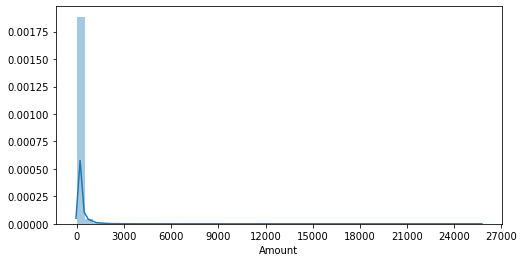

In [8]:
#AMOUNT : distribution of its values
fig, ax = plt.subplots(figsize=(8,4)) 
ax = sns.distplot(df['Amount']);
ax.xaxis.set_major_locator(ticker.MultipleLocator(3000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

It is clear that the **Amount** of the large majority of the transactions, is under 1000. This is in line with our intuition, as people do use their credit card in many small everyday transactions. Of course, there is also a minor portion of transactions valued above 1000.

In [9]:
# CLASS : let's check how many transactions are fraudulent, and how many are not
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

print('Non-Fraudulent transactions: {}, which is {:.1%} of the dataset'.format(len(not_fraud_df.index), len(not_fraud_df.index)/len(df)))
print('Fraudulent transactions: {}, which is {:.1%} of the dataset'.format(len(fraud_df.index), len(fraud_df.index)/len(df)))

Non-Fraudulent transactions: 284315, which is 99.8% of the dataset
Fraudulent transactions: 492, which is 0.2% of the dataset


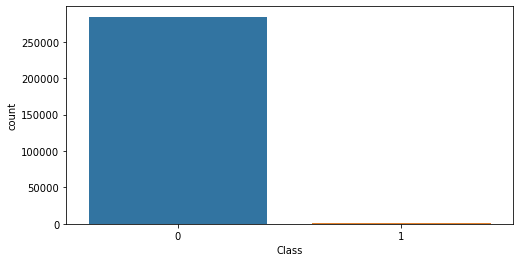

In [10]:
#We can also look into it in a graph:
fig, ax = plt.subplots(figsize=(8,4)) 
ax = sns.countplot(x="Class", data= df)

There are **492 frauds**, only *0.2%* of the dataset. That is an **Imbalanced Dataset**. As the dataset is heavily skewed, we better not use it as-is for training our model, as its learning might be greatly biased by this uneven distribution. 

## Dealing with Imbalanced Datasets

The bibliograghy suggests a variety of measures for overcoming the challenge of imbalanced datasets, such as:

* *Collecting more data* (if possible)
* *Resampling the dataset* (oversampling the under-represented class, or undersampling the over-represented class)
* *Choosing wisely the performance metric* ('Accuracy' is not advised)
* *Use penalized learning algorithms* (imposing cost on the model for mis-classifying the minority class
* *Try several algorithms to compare results* (such as Multiple Classifier Systems)

In this occassion, the dataset is finite, so *collecting more data* is not possible. However, in another business scenario, enriching the dataset with more data could balance to a good extent the two classes. For this problem we will use a combination of other measures, namely: resampling / relevant performance metrics / a variety of algorithms.

### Resampling
In order to train the model with an even collection of fraudulent and non-fraudulent cases, we will extract at random 492 records of non-fraudulent transactions, and concatenate the two sets of 492 records, in order to create our training set. This method of extracting just a part of the majority class, is the aforementioned **"undersampling"**.

In [11]:
# picking 492 random non-fraud records
not_fraud_temp = not_fraud_df.sample(492)

In [12]:
# checking the dataframe dimensions
not_fraud_temp.shape

(492, 31)

In [13]:
#lets concatenate the two
balanced_df = pd.concat([not_fraud_temp, fraud_df])

In [14]:
#lets see if we got it right
not_fraud_df = balanced_df[balanced_df['Class'] == 0]
fraud_df = balanced_df[balanced_df['Class'] == 1]

print('Non-Fraudulent transactions: {}, which is {:.1%} of the dataset'.format(len(not_fraud_df.index), len(not_fraud_df.index)/len(balanced_df)))
print('Fraudulent transactions: {}, which is {:.1%} of the dataset'.format(len(fraud_df.index), len(fraud_df.index)/len(balanced_df)))

Non-Fraudulent transactions: 492, which is 50.0% of the dataset
Fraudulent transactions: 492, which is 50.0% of the dataset


As per above, we confirmed that the newly formed dataset contains an equal mix of both classes. We can also *shuffle* the records randomly within the dataset:

In [15]:
#we will shuffle a bit
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [16]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,147168.0,-1.462843,1.841591,-1.132265,-0.763961,-0.400711,-0.757969,-0.275847,1.324719,-0.314714,...,-0.166933,-0.623177,0.194957,-0.426889,-0.339866,0.164637,0.085875,0.003923,1.98,0
1,64093.0,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,-1.606743,...,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,294.90,1
2,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1
3,96206.0,-0.673567,0.676251,1.355359,0.069156,0.538306,-0.486402,0.853561,-0.284482,1.033618,...,-0.017872,0.356323,-0.459748,-0.070829,0.903309,0.462327,-0.010298,0.050957,49.20,0
4,71654.0,-1.429187,1.559601,0.285720,-0.882398,0.025204,0.038728,-0.003162,0.968880,-0.197083,...,-0.169406,-0.427792,-0.067647,-0.900268,-0.029222,0.392328,0.179196,0.102101,4.00,0


We can check the resulting dataset for correlations. As mentioned, the V1-V28 data are obfuscated, so we cannot draw many conclusions about their nature. However, we can still check if there is a strong correlation between them and the 'Class' (Non-Fraud/Fraud):

In [17]:
# Correlation of the entire DataFrame
corr = balanced_df.corr()

# create a mask to show only one triangle of correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

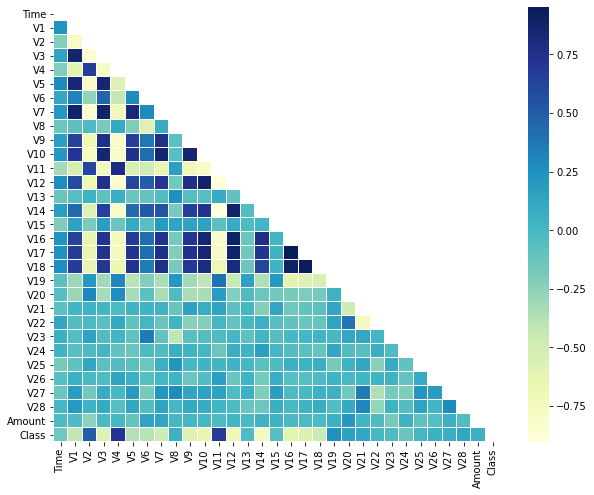

In [18]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax = sns.heatmap(corr,linewidths=.01, mask=mask, cmap="YlGnBu")

We see that **'Class'** has some level of correlation with features V2, V4 ,V11. **'Amount'** is more *correlated* with V6, V7: presumably these features are quite relevant to one's spending habits (e.g. "annual income" of the cardholder). It is worth mentioning that **'Class'** is also *negatively correlated* with some features, such as V9, V10 and V16-V18.

### Classification Metrics

The purpose is to identify and train a machine learning model that is characterized by **"high performance"** in this classification problem. However, what **metric** would denote "high performance" in our case? The main metrics used to evaluate a classification model are accuracy, precision, and recall. They are nicely described in detail 
<a href="https://en.wikipedia.org/wiki/Precision_and_recall" target="_blank">here</a> and <a href="https://www.jeremyjordan.me/evaluating-a-machine-learning-model/" target="_blank">here</a>.

In short:
* **Accuracy** is the percentage of *total correct predictions* over the *full dataset*.
* **Precision** is the percentage of *relevant records* over all records predicted to *belong in a certain class*.
* **Recall** is the percentage of *records which were predicted to belong to a class*, over all records that *truly belong in the class*.

As a reminder, in classification problems, a classification decision can result in one out of four things:
* **True Positive (TP)**: We predict that record X *belongs* in a certain class, and it actually *belongs* in that class.
* **True Negative (TN)**: We predict that record X *does not belong* in a certain class, and it actually *does not belong* in that class.
* **False Positive (FP)**: We predict that record X *belongs* in a certain class, and it actually *does not belong* in that class.
* **False Negative (FN)**: We predict that record X *does not belong* in a certain class, and it actually *belongs* in that class.

These are clearly depicted in the so-called Confusion Matrix, which I will also show later on.

Based on the above descriptions, the aforementioned metrics are defined as:
* Accuracy = (TP+TN)/Total
* Precision = TP/(TP+FP)
* Recall = TP/(TP+FN)

One might feel tempted to choose Accuracy as our performance metric - which is also the most intuitive concept. However, *this is not a good KPI for a classification problem*: Let's imagine a scenario where our classifier labels **all records as Class 0** (non-fraudulent). Technically, this means that the algorithm has a **99.8% Accuracy, which is a misleading outcome**! This line of thinking is flawed, as the algorithm disregards completely the fraudulent entries.

In Classifications problems, we should focus more on the two metrics of Recall and Precision. Luckily, there is a metric combining them, the harmonic mean of both, also known as F1 score: 
* F1-score = 2 * ( Precision * Recall) / (Precision + Recall)


### AUC-ROC Curve

As an alternative to the F1 score, the model can be further evaluated in a "graphic way", thanks to the **Area Under Curve - Receiver Operating Characteristic (AUC - ROC)** metric. This is the plot of the true positive rate (Recall) against the false positive rate. By plotting the ROC curve for different models, and by observing which curve achieved the larger area-under-the-curve, we can define which model performed best. 

The AOC-ROC measure of scikit-learn outputs a number within [0,1], where 0.5 signifies the performance of random guessing. A model performs better when scoring closer to 1. We will use that as well in the selection process.

### Testing various learning algorithms

I will test six of the most popular models for classifications: Gaussian naive Bayes, Logistic regression, K-Neighbours, Random Forests, XGBoost, Support Vector Machine (SVM). Through this practical experimentation, I will be able to pick the learning model that performs best, and then *tune its hyperparameters* as the final step.

In [19]:
#importing some of the most popular models:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Model Training & Performance Evaluation

Let's start by spliting the input variables (X) and target variable (y), of our dataset, for the model training:

In [20]:
# X are the input variables, and y the target variable ('Class')
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

I will perform a 70/30 train-test split of the data: 70% will be used asa training dataset, while 30% will be the test dataset, and it will not be exposed to the ML algorithms until the very end - as it will be used to evaluate the prediction performance of the final model.

In [21]:
from sklearn.model_selection import train_test_split

# splitting the dataset with 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# turn the values into an array, for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print ('Sizes of sets:')
print('X_train:', X_train.shape, ' X_test:', X_test.shape)
print('Y_train:', y_train.shape, ' Y_test:',  y_test.shape)

Sizes of sets:
X_train: (688, 30)  X_test: (296, 30)
Y_train: (688,)  Y_test: (296,)


### K-fold Cross-Validation

For each of the algorithms, I will follow the resampling technique of **k-fold cross-validation**:
This method splits the training dataset further into *k parts (folds)*, and then *fits the model on k-1 folds* (*temporary "training" data*) before making *predictions for the kth fold* (*temporary "test" data*). This process is repeated k times, leaving (holding-out) each time a different fold as the "test" data. For each of the k runs, we calculate the model performance measures, and finally the overall model performance is calculated as the average of those k performance measures. In terms of the 'measure', I will make use of the both the **f1 score** and the **AUC-ROC score**, as per the above.


### Normalization

By employing the below function, we can firstly verify the **min & max** value per feature, and witness that there are some differences in scale:

In [22]:
#Lets check min/max per column: 
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

balanced_df.apply(minMax)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
min,50.0,-30.552380,-13.158419,-31.103685,-4.102214,-22.105532,-8.181825,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.315735,-7.263482,-2.648540,0.0,0
max,172544.0,2.399433,22.057729,3.446470,12.114672,11.758819,6.474115,7.501867,20.007208,7.381458,...,27.202839,8.361985,8.328967,1.204603,2.208209,2.745261,3.052358,1.787492,3980.0,1


We see that **'Time'** and **'Amount'** are of different scales compared to **V1, V2, … V28**, so it is worth normalizing: The goal of normalization is to transform the values of numeric columns in order to reflect *a common scale*, without large differences. This will help gradient descents to converge more quickly and the model to achieve better performance.

**Important note**: If we normalize the data *before* the cross-validation, we actually *leak information about the distribution of the test data* into the way we normalize the training data. Essentially, we allow data that goes on to become the test set, to **"spill over"** and affect our training set, potentially causing overly optimistic performance metrics. In other words, although we are not using directly the test data for training our model, we still 'reveal' information about the test data into the training process *('contamination')*. We can handle this issue by performing the normalization **inside the cross-validation** and **only on the training data** of each k-th run. This will be achieved via the Pipeline function of scikit-learn, which 'glues together' our normalizer (Standard Scaler), and the classifier.

Let's proceed with the training:

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics 

algorithms = [] #this is a list holding our algorithm name abbreviations & models

algorithms.append(('XGB', XGBClassifier()))
algorithms.append(('RF', RandomForestClassifier()))
algorithms.append(('GNB', GaussianNB()))
algorithms.append(('LR', LogisticRegressionCV(max_iter=4000)))
algorithms.append(('SVM', SVC()))
algorithms.append(('KN', KNeighborsClassifier()))

for i, algorithm in algorithms:
    #instantiate Pipeline, in order to perform normalization within each K-fold of each algorithm:
    pipe = Pipeline ([
        ('scaler', StandardScaler()),
        ('algo',algorithm)
    ])
    
    kfold = KFold(n_splits=10, shuffle = True, random_state=42) #we define 10 folds for this cross-validation
    cv_roc = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='roc_auc') #calculating roc-auc score of the algorithm
    cv_f1 = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='f1') #calculating f1 score of the algorithm

    print('{} -> ROC AUC score: {:.2%},  F1 score: {:.2%} '.format(i, cv_roc.mean(),cv_f1.mean()))

XGB -> ROC AUC score: 98.71%,  F1 score: 95.20% 
RF -> ROC AUC score: 98.31%,  F1 score: 94.20% 
GNB -> ROC AUC score: 96.03%,  F1 score: 91.05% 
LR -> ROC AUC score: 98.26%,  F1 score: 94.57% 
SVM -> ROC AUC score: 98.45%,  F1 score: 92.60% 
KN -> ROC AUC score: 95.04%,  F1 score: 90.69% 


Looking at the classification results (ROC-AUC and F1 score), we observe that *XGBoost* and *Random Forest* classifiers outperform the others (XGBoost being slightly better). They both use tree ensembles, which seem to perform excellent in our classification problem. Between the two, I will proceed with **Random Forest**, due to its more intuitive nature, and work on tuning its hyperparameters. <a href="https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76#:~:text=The%20random%20forest%20combines%20hundreds,predictions%20of%20each%20individual%20tree" target="_blank">Here</a> is an excellent article explaining in detail Decision Trees and Random Forests.

## Tuning model hyperparameters

Let's create a performance **Baseline**, by creating a random... Random Forest, and check how well it predicts our *test values*, if trained with the training dataset:

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state = 10)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the predict method of the Random Forest on the test data
pred = rf.predict(X_test)

# printing f1 score
base_f1_score = metrics.f1_score(y_test, pred)
print('F1 Score (un-tuned Random Forest): {:.2%} '.format(base_f1_score))

F1 Score (un-tuned Random Forest): 92.47% 


The performance seems already good (92%), but we will try to improve it.

As gathering more data and feature engineering are not valid options in our case, we will ensure that we choose suitable hyperparameters to maximize performance. Instead of *manual tuning*, which is not efficient enough, we will be *systematic* by evaluating a broad set of hyperparameter combinations **('parameter grid')** to identify what works best. For this, I will use the GridSearchCV function of Sci-kit Learn, that allows us to check a matrix of different hyperparameter values. The grid search process utilizes again the concept of cross-validation, to avoid overfitting (parameter 'cv' of the following GridSearchCV function). By default, *accuracy* is the score that is optimized, but based on the logic shared above, we will opt for the *f1-score*.

As a reminder, I have already hold-out 30% of the initial (balanced) dataset as "test data", that the model does not "see". We will perform Grid Search only on the "training data" (and not the whole dataset), in order to *avoid data leakage and overfitting*.

In terms of hyperparameters, the most important ones for a Random Forest, are:

* *n_estimators*: number of trees in the forest
* *max_depth*: max number of levels in each decision tree
* *min_samples_split*: min number of data points placed in a node before the node is split
* *min_samples_leaf*: min number of data points allowed in a leaf node
* *max_features*: max number of features considered for splitting a node

One could work towards an exhaustive parameter grid, however, this is too computationally expensive. In order to achieve a good balance, in the below code I am evaluating *288 different combinations* of the above hyperparameters.

In [28]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state = 10)

# Create the parameter grid: This is 4 x 4 x 3 x 3 x 2 = 288 combinations of parameters
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [50, 100, 150, 200],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 9, 12],
        'max_features': [2, 3]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, refit=True, n_jobs = -1, verbose = 2, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters set, as found on the training set
print (grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.3min finished


{'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1000}


The model identified the above values **("best_params_")** as the *best hyperparameter combination, based on the f1 score*. 
We will now: a) save this model (**"best_grid"** variable), b) apply the model to the test set, c) evaluate its f1 performance on the test set and compare it with our *Baseline* above.

In [29]:
best_grid = grid_search.best_estimator_
print (best_grid)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


In [30]:
# Use the predict method of the final model on the test data
pred = best_grid.predict(X_test)

# Calculate the new f1 score
f1_score = metrics.f1_score(y_test, pred)
print('F1 Score (Tuned Random Forest): {:.2%} '.format(f1_score))

# Comparing this performance vs our baseline model
print('Improvement of {:0.2f}% versus baseline RF.'.format( 100 * (f1_score - base_f1_score) / base_f1_score))

F1 Score (Tuned Random Forest): 92.78% 
Improvement of 0.34% versus baseline RF.


We see that by tuning the hyperparameters, we achieved a small *additional 0.34% improvement on f1-score*. 
For the sake of completeness, let's look at the *Classification Report* and the *Confusion Matrix* of the final model:

In [31]:
# Classification Report
from sklearn.metrics import classification_report

target_names = ['Not Fraud', 'Fraud']
print(classification_report(y_test, pred, target_names = target_names))

              precision    recall  f1-score   support

   Not Fraud       0.89      0.97      0.93       144
       Fraud       0.97      0.89      0.93       152

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



[Text(51.0, 0.5, 'True Class'),
 Text(0.5, 33.0, 'Predicted Class'),
 Text(0.5, 1.0, 'Confusion Matrix')]

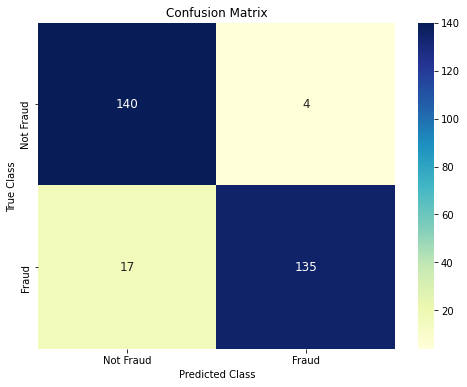

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(8,6))  
ax = sns.heatmap(cm, annot=True,annot_kws={"size": 12}, fmt=".0f", xticklabels = target_names, yticklabels = target_names,cmap="YlGnBu")
 
ax.set(title="Confusion Matrix",
      xlabel="Predicted Class",
      ylabel="True Class",)

We see that the model misclassified **only 21 values** (4 False-Positives and 17 False-Negatives), out of the 296 records of the test set. 

Very good performance, as the above F1 score depicts!